In [1]:
import matplotlib.pyplot as plt
import numpy as np

Rayleighs densitetsfunktion ser ut som
$f(x;b) = (x/b^2) * exp(-x^2/(2b^2))$

Ponera att vi har en mängd observationer på en variabel och vi vill minsta-kvadrat-estimera vad b är. Vi kan börja med att numeriskt ta fram lite Rayleigh(1)-distribuerade variabler och plotta dem

Sannolikheten ska summera till 100%. Den summerade till 100.00%


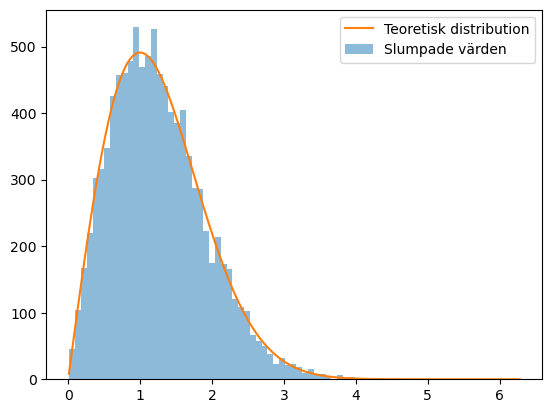

In [87]:
import numpy as np
import matplotlib.pyplot as plt
# Definera Rayleighs täthetsfunktion

# Gör N stycken slumpmässiga punkter. Gör dem som magnituden (längden) av en slumpmässig tvådimensionell vektor
# där båda riktningarna är normalfördelade N(0,1)
N = 10000
yh = np.sqrt(np.random.randn(N)**2 + np.random.randn(N)**2)
# Plotta histogrammet hur y är fördelad
num_bins=50
plt.hist(yh,bins=num_bins, alpha=0.5);
# Räkna ut Rayleigh-funktionen för x. Vi gör det numeriskt så vi tar lite punkter i (0,2pi] med dx mellan dem.
def f(x,b):
    return x/b**2*np.exp(-x**2/(2*b**2))
dx = 0.01
x = np.arange(dx, 2*np.pi, dx)
#b = np.sqrt(np.sum(yh**2) / len(yh)) # ML-estimeringen av b
b = 1  # Varför inte ML?
y = f(x, b)
# Plotta ut vår funktion på samma graf. Vi använder ML-skattningen av b som vi räknade ut innan. 
# Det är bara för att se hur bra ML-skattningen var. Vi har ju räknat ut histogram för N värden så vi
# måste räkna ut hur breda binsen är i histogrammet och multiplicera med det.
bin_width = (yh.max() - yh.min()) / num_bins
plt.plot(x, y*N*bin_width);
plt.legend(['Teoretisk distribution', 'Slumpade värden'])
# Sannolikheten ska summera till 100% med tillräckligt små dx
print(f'Sannolikheten ska summera till 100%. Den summerade till {sum(f(x, b)*dx)*100:.2f}%')

Vi kan göra en Minsta-kvadratskattning av B också. Om vi har våra yh (slumpade) så vill vi hitta b som minimerar

$error = ||y - yh||_2$

eller utskrivet minimera med avseende på b
$error = \sqrt{\sum{(f(x;b)-yh})^2} $